Week 1: Intro to tech

In [80]:
import numpy as np
import uproot
import vector
import awkward
import matplotlib.pyplot as plt
import mplhep as hep

Unpacking data 
1. Extracting 3 top data
2. separating into top top antitop and top antitop antitop events

In [81]:
tree = uproot.open('c:/Users/matis/OneDrive/Documents/Y4/Project/3tops_tttW_partonic_skimmed_2609.root')['tree']
events = tree.arrays(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e'])

mask_tttbarW = (awkward.num(events['top_pt']) == 2) & (awkward.num(events['anti_top_pt']) == 1)
mask_ttbartbarW = (awkward.num(events['top_pt']) == 1) & (awkward.num(events['anti_top_pt']) == 2)
tttbarW = events[mask_tttbarW]
ttbartbarW = events[mask_ttbartbarW]

top top anti-top filtering

In [82]:
pt_mask_1 = tttbarW['top_pt'][:,0] > 50
pt_mask_2 = tttbarW['top_pt'][:,1] > 50

eta_mask_1 = (tttbarW['top_eta'][:,0] > -2.4) & (tttbarW['top_eta'][:,0] < 2.4)
eta_mask_2 = (tttbarW['top_eta'][:,1] > -2.4) & (tttbarW['top_eta'][:,1] < 2.4)

anti_pt_mask = tttbarW['anti_top_pt']> 50

anti_eta_mask = (tttbarW['anti_top_eta'] > -2.4) & (tttbarW['anti_top_eta'] < 2.4)

masks_tttbarW = anti_eta_mask & anti_pt_mask & pt_mask_1 & pt_mask_2 & eta_mask_1 & eta_mask_2

top anti-top anti-top filtering 

In [83]:
bar_pt_mask = ttbartbarW['top_pt'] > 50

bar_eta_mask = (ttbartbarW['top_eta'] > -2.4) & (ttbartbarW['top_eta'] < 2.4)

bar_anti_pt_mask_1 = ttbartbarW['anti_top_pt'][:,0]> 50
bar_anti_pt_mask_2 = ttbartbarW['anti_top_pt'][:,1]> 50

bar_anti_eta_mask_1 = (ttbartbarW['anti_top_eta'][:,0] > -2.4) & (ttbartbarW['anti_top_eta'][:,0] < 2.4)
bar_anti_eta_mask_2 = (ttbartbarW['anti_top_eta'][:,1] > -2.4) & (ttbartbarW['anti_top_eta'][:,1] < 2.4)

masks_ttbartbarW = bar_eta_mask & bar_pt_mask & bar_anti_pt_mask_1 & bar_anti_pt_mask_2 & bar_anti_eta_mask_1 & bar_anti_eta_mask_2

vector making

In [84]:
tops = vector.zip({'pt':tttbarW['top_pt'],'eta':tttbarW['top_eta'],'phi':tttbarW['top_phi'], 'mass':172.76})
anti_tops = vector.zip({'pt':tttbarW['anti_top_pt'],'eta':tttbarW['anti_top_eta'],'phi':tttbarW['anti_top_phi'], 'mass':172.76})

filtered_tops= tops[masks_tttbarW]
filtered_anti_tops = anti_tops[masks_tttbarW]

tops_bar = vector.zip({'pt':ttbartbarW['top_pt'],'eta':ttbartbarW['top_eta'],'phi':ttbartbarW['top_phi'], 'mass':172.76})
anti_tops_bar = vector.zip({'pt':ttbartbarW['anti_top_pt'],'eta':ttbartbarW['anti_top_eta'],'phi':ttbartbarW['anti_top_phi'], 'mass':172.76})

filtered_tops_bar= tops_bar[masks_ttbartbarW]
filtered_anti_tops_bar = anti_tops_bar[masks_ttbartbarW]

In [88]:
print(np.shape(tops_1))

[24930]


In [85]:
tops_1 = vector.zip({'pt':tttbarW['top_pt'][:,0],'eta':tttbarW['top_eta'][:,0],'phi':tttbarW['top_phi'][:,0], 'mass':172.76})
tops_2 = vector.zip({'pt':tttbarW['top_pt'][:,1],'eta':tttbarW['top_eta'][:,1],'phi':tttbarW['top_phi'][:,1], 'mass':172.76})
anti_tops = vector.zip({'pt':tttbarW['anti_top_pt'],'eta':tttbarW['anti_top_eta'],'phi':tttbarW['anti_top_phi'], 'mass':172.76})
print(len(tops_1))
print(len(masks_tttbarW))
filtered_tops_1 = tops_1[masks_tttbarW]
filtered_tops_2 = tops_2[masks_tttbarW]


bar_tops = vector.zip({'pt':ttbartbarW['top_pt'],'eta':ttbartbarW['top_eta'],'phi':ttbartbarW['top_phi'], 'mass':172.76})
bar_antitops_1 = vector.zip({'pt':ttbartbarW['anti_top_pt'][:,0],'eta':ttbartbarW['anti_top_eta'][:,0],'phi':ttbartbarW['anti_top_phi'][:,0], 'mass':172.76})
bar_antitops_2 = vector.zip({'pt':ttbartbarW['anti_top_pt'][:,1],'eta':ttbartbarW['anti_top_eta'][:,1],'phi':ttbartbarW['anti_top_phi'][:,1], 'mass':172.76})


24930
24930


IndexError: cannot slice NumpyArray (of length 24930) with [[0], [], [0], [], [], [0], [0], [0], ..., [], [0], [0], [0], [0], [0], [0]]: too many jagged slice dimensions for array

This error occurred while attempting to slice

    <MomentumArray4D [{rho: 182, phi: -1.36, ...}, ...] type='24930 * Momen...'>

with

    <Array [[True], [False], [True], ..., [True], [True]] type='24930 * var * bool'>

4 tops example

In [34]:
tree = uproot.open('C:\Users/matis/OneDrive/Documents/Y4/Project/4tops_partonic_skimmed_2409.root')['tree']
events = tree.arrays(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e'])

for data in tree.iterate(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e']):

    pt_mask_1 = data['top_pt'][:, 0] > 50
    pt_mask_2 = data['top_pt'][:, 1] > 50

    eta_mask_1 = (data['top_eta'][:, 0] > -2.4) & (data['top_eta'][:, 0] < 2.4)
    eta_mask_2 = (data['top_eta'][:, 1] > -2.4) & (data['top_eta'][:, 1] < 2.4)

    anti_pt_mask_1 = data['anti_top_pt'][:, 0] > 50
    anti_pt_mask_2 = data['anti_top_pt'][:, 1] > 50

    anti_eta_mask_1 = (data['anti_top_eta'][:, 0] > -2.4) & (data['anti_top_eta'][:, 0] < 2.4)
    anti_eta_mask_2 = (data['anti_top_eta'][:, 1] > -2.4) & (data['anti_top_eta'][:, 1] < 2.4)

    masks = pt_mask_1 & pt_mask_2 & eta_mask_1 & eta_mask_2 & anti_pt_mask_1 & anti_pt_mask_2 & anti_eta_mask_1 & anti_eta_mask_2

    top_pt = awkward.to_numpy(data['top_pt'])
    top_e = awkward.to_numpy(data['top_e'])
    top_eta = awkward.to_numpy(data['top_eta'])
    antitop_eta = awkward.to_numpy(data['anti_top_eta'])


    filtered_top_pt = top_pt[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_top_e = top_e[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_top_eta = top_eta[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_antitop_eta = antitop_eta[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]

5



2. Plotting Histograms

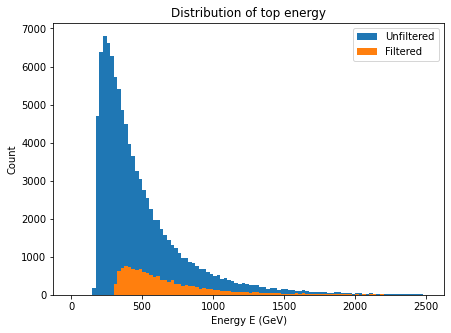

In [6]:
split_top_e = top_e.reshape(100000,1)
split_filtered_top_e = filtered_top_e.reshape(13634,1)

plt.figure(figsize=(7,5))
plt.hist(split_top_e, bins=100, label = 'Unfiltered', range=(0,2500))
plt.hist(split_filtered_top_e, bins=100, label = 'Filtered', range=(0,2500))
plt.title("Distribution of top energy")
plt.xlabel(r"Energy E (GeV)")
plt.ylabel("Count")
plt.legend()
plt.show()

In [7]:
split_antitop_eta = antitop_eta.reshape(100000,1)
split_filtered_antitop_eta = filtered_antitop_eta.reshape(13634,1)
split_top_eta = top_eta.reshape(100000,1)
split_filtered_top_eta = filtered_top_eta.reshape(13634,1)

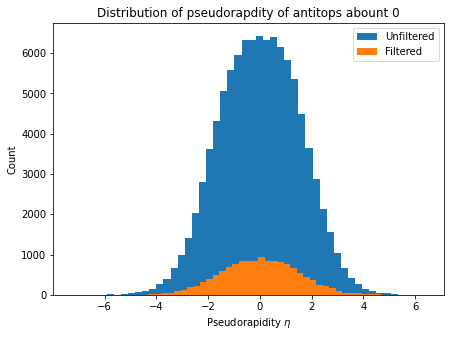

In [8]:
plt.figure(figsize=(7,5))
plt.hist(split_antitop_eta, bins=50, label = 'Unfiltered')
plt.hist(split_filtered_antitop_eta, bins=50, label = 'Filtered')
plt.title("Distribution of pseudorapdity of antitops abount 0")
plt.xlabel(r"Pseudorapidity $\eta$")
plt.ylabel("Count")
plt.legend()
plt.show()

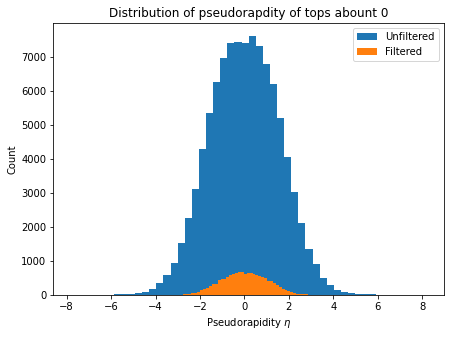

In [9]:
plt.figure(figsize=(7,5))
plt.hist(split_top_eta, bins=50, label = 'Unfiltered')
plt.hist(split_filtered_top_eta, bins=50, label = 'Filtered')
plt.title("Distribution of pseudorapdity of tops abount 0")
plt.xlabel(r"Pseudorapidity $\eta$")
plt.ylabel("Count")
plt.legend()
plt.show()

Vectors
1. Masks/Filters

In [79]:
pt_mask_1 = events['top_pt'][:, 0] > 50
pt_mask_2 = events['top_pt'][:, 1] > 50

eta_mask_1 = (events['top_eta'][:, 0] > -2.4) & (data['top_eta'][:, 0] < 2.4)
eta_mask_2 = (events['top_eta'][:, 1] > -2.4) & (data['top_eta'][:, 1] < 2.4)

anti_pt_mask_1 = events['anti_top_pt'][:, 0] > 50
anti_pt_mask_2 = events['anti_top_pt'][:, 1] > 50

anti_eta_mask_1 = (events['anti_top_eta'][:, 0] > -2.4) & (data['anti_top_eta'][:, 0] < 2.4)
anti_eta_mask_2 = (events['anti_top_eta'][:, 1] > -2.4) & (data['anti_top_eta'][:, 1] < 2.4)

masks = pt_mask_1 & pt_mask_2 & eta_mask_1 & eta_mask_2 & anti_pt_mask_1 & anti_pt_mask_2 & anti_eta_mask_1 & anti_eta_mask_2

IndexError: cannot slice ListArray (of length 50000) with array(1): index out of range while attempting to get index 1 (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-38/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_next_at.cpp#L21)

This error occurred while attempting to slice

    <Array [[182, 108], [242], ..., [185, 364]] type='50000 * var * float32'>

with

    (:, 1)

2. Top AntiTop individual awkward vecors

In [78]:
tops = vector.zip({'pt':events['top_pt'],'eta':events['top_eta'],'phi':events['top_phi'], 'mass':172.76})
anti_tops = vector.zip({'pt':events['anti_top_pt'],'eta':events['anti_top_eta'],'phi':events['anti_top_phi'], 'mass':172.76})

filtered_tops= tops[masks]
filtered_anti_tops = anti_tops[masks]

IndexError: cannot slice RegularArray (of length 1) with [[0], [], [0], [], [], [0], [0], [0], ..., [], [0], [0], [0], [0], [0], [0]]: cannot fit jagged slice with length 24930 into RegularArray of size 50000

This error occurred while attempting to slice

    <MomentumArray4D [[{rho: 182, ...}, {...}], ..., [...]] type='50000 * v...'>

with

    <Array [[True], [False], [True], ..., [True], [True]] type='24930 * var * bool'>

3.1 4top events seperated into individual top channels + filtered

In [12]:
top1 = vector.zip({'pt':events['top_pt'][:,0],'eta':events['top_eta'][:,0],'phi':events['top_phi'][:,0], 'mass':172.76})
top2 = vector.zip({'pt':events['top_pt'][:,1],'eta':events['top_eta'][:,1],'phi':events['top_phi'][:,1], 'mass':172.76})
anti_top1 = vector.zip({'pt':events['anti_top_pt'][:,0],'eta':events['anti_top_eta'][:,0],'phi':events['anti_top_phi'][:,0], 'mass':172.76})
anti_top2 = vector.zip({'pt':events['anti_top_pt'][:,1],'eta':events['anti_top_eta'][:,1],'phi':events['anti_top_phi'][:,1], 'mass':172.76})

filtered_top1 = top1[masks]
filtered_top2 = top2[masks]
filtered_anti_top1 = anti_top1[masks]
filtered_anti_top2 = anti_top2[masks]

four_tops = top1+top2+anti_top1+anti_top2
filtered_4_tops = filtered_top1+filtered_top2+filtered_anti_top1+filtered_anti_top2
filtered_4_tops = filtered_4_tops[filtered_4_tops.mass > 500]

3.2a Extracting deltaR values for highest and second highest pt unfiltered tops

In [13]:
pts = awkward.Array([top1.pt, top2.pt, anti_top1.pt, anti_top2.pt])

sorted_pts = awkward.sort(pts, axis=0, ascending=False)

max_pts = sorted_pts[0,:]
second_max_pts = sorted_pts[1,:]

deltaRs = []
for i in range(len(top1)):
    if max_pts[i] == top1[i].pt:
        if second_max_pts[i] == top2[i].pt:
            deltaRs.append(top1[i].deltaR(top2[i]))
        elif second_max_pts[i] == anti_top1[i].pt:
            deltaRs.append(top1[i].deltaR(anti_top1[i]))
        elif second_max_pts[i] == anti_top2[i].pt:
            deltaRs.append(top1[i].deltaR(anti_top2[i]))
    
    elif max_pts[i] == top2[i].pt:
        if second_max_pts[i] == top1[i].pt:
            deltaRs.append(top2[i].deltaR(top1[i]))
        elif second_max_pts[i] == anti_top1[i].pt:
            deltaRs.append(top2[i].deltaR(anti_top1[i]))
        elif second_max_pts[i] == anti_top2[i].pt:
            deltaRs.append(top2[i].deltaR(anti_top2[i]))

    elif max_pts[i] == anti_top1[i].pt:
        if second_max_pts[i] == top1[i].pt:
            deltaRs.append(anti_top1[i].deltaR(top1[i]))
        elif second_max_pts[i] == top2[i].pt:
            deltaRs.append(anti_top1[i].deltaR(top2[i]))
        elif second_max_pts[i] == anti_top2[i].pt:
            deltaRs.append(anti_top1[i].deltaR(anti_top2)[i])

    elif max_pts[i] == anti_top2[i].pt:
        if second_max_pts[i] == top1[i].pt:
            deltaRs.append(anti_top2[i].deltaR(top1[i]))
        elif second_max_pts[i] == top2[i].pt:
            deltaRs.append(anti_top2[i].deltaR(top2[i]))
        elif second_max_pts[i] == anti_top1[i].pt:
            deltaRs.append(anti_top2[i].deltaR(anti_top1[i]))


3.2b Extracting DeltaR values for highest and second highest pt filtered tops

In [14]:
filtered_pts = awkward.Array([filtered_top1.pt, filtered_top2.pt, filtered_anti_top1.pt, filtered_anti_top2.pt])

filtered_sorted_pts = awkward.sort(filtered_pts, axis=0, ascending=False)

filtered_max_pts = filtered_sorted_pts[0,:]
filtered_second_max_pts = filtered_sorted_pts[1,:]

filtered_deltaRs = []
for i in range(len(filtered_top1)):
    if filtered_max_pts[i] == filtered_top1[i].pt:
        if filtered_second_max_pts[i] == filtered_top2[i].pt:
            filtered_deltaRs.append(filtered_top1[i].deltaR(filtered_top2[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top1[i].pt:
            filtered_deltaRs.append(filtered_top1[i].deltaR(filtered_anti_top1[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top2[i].pt:
            filtered_deltaRs.append(filtered_top1[i].deltaR(filtered_anti_top2[i]))
    
    elif filtered_max_pts[i] == filtered_top2[i].pt:
        if filtered_second_max_pts[i] == filtered_top1[i].pt:
            filtered_deltaRs.append(filtered_top2[i].deltaR(filtered_top1[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top1[i].pt:
            filtered_deltaRs.append(filtered_top2[i].deltaR(filtered_anti_top1[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top2[i].pt:
            filtered_deltaRs.append(filtered_top2[i].deltaR(filtered_anti_top2[i]))

    elif filtered_max_pts[i] == filtered_anti_top1[i].pt:
        if filtered_second_max_pts[i] == filtered_top1[i].pt:
            filtered_deltaRs.append(filtered_anti_top1[i].deltaR(filtered_top1[i]))
        elif filtered_second_max_pts[i] == filtered_top2[i].pt:
            filtered_deltaRs.append(filtered_anti_top1[i].deltaR(filtered_top2[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top2[i].pt:
            filtered_deltaRs.append(filtered_anti_top1[i].deltaR(filtered_anti_top2)[i])

    elif filtered_max_pts[i] == filtered_anti_top2[i].pt:
        if filtered_second_max_pts[i] == filtered_top1[i].pt:
            filtered_deltaRs.append(filtered_anti_top2[i].deltaR(filtered_top1[i]))
        elif filtered_second_max_pts[i] == filtered_top2[i].pt:
            filtered_deltaRs.append(filtered_anti_top2[i].deltaR(filtered_top2[i]))
        elif filtered_second_max_pts[i] == filtered_anti_top1[i].pt:
            filtered_deltaRs.append(filtered_anti_top2[i].deltaR(filtered_anti_top1[i]))

4. Plotting Histograms for invariant mass distributions and DeltaR values

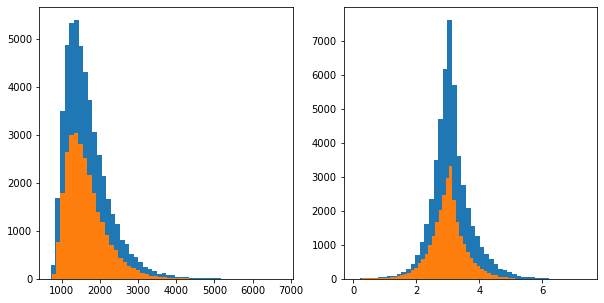

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
ax[0].hist(four_tops.mass, bins=50)
ax[0].hist(filtered_4_tops.mass, bins=50)
ax[1].hist(deltaRs, bins=50)
ax[1].hist(filtered_deltaRs, bins=50)
plt.show()

3 top jet

In [16]:
tree_3j = uproot.open('C:/Users/matis/OneDrive/Documents/Y4/Project/3tops_tttj_partonic_skimmed_2609.root')['tree']
events_3j = tree.arrays(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e'])

for data in tree_3j.iterate(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e']):

    pt_mask_1 = data['top_pt'][:, 0] > 50
    pt_mask_2 = data['top_pt'][:, 1] > 50

    eta_mask_1 = (data['top_eta'][:, 0] > -2.4) & (data['top_eta'][:, 0] < 2.4)
    eta_mask_2 = (data['top_eta'][:, 1] > -2.4) & (data['top_eta'][:, 1] < 2.4)

    anti_pt_mask_1 = data['anti_top_pt'][:, 0] > 50
    anti_pt_mask_2 = data['anti_top_pt'][:, 1] > 50

    anti_eta_mask_1 = (data['anti_top_eta'][:, 0] > -2.4) & (data['anti_top_eta'][:, 0] < 2.4)
    anti_eta_mask_2 = (data['anti_top_eta'][:, 1] > -2.4) & (data['anti_top_eta'][:, 1] < 2.4)

    masks = pt_mask_1 & pt_mask_2 & eta_mask_1 & eta_mask_2 & anti_pt_mask_1 & anti_pt_mask_2 & anti_eta_mask_1 & anti_eta_mask_2

    top_pt = awkward.to_numpy(data['top_pt'])
    top_e = awkward.to_numpy(data['top_e'])
    top_eta = awkward.to_numpy(data['top_eta'])
    antitop_eta = awkward.to_numpy(data['anti_top_eta'])


    filtered_top_pt = top_pt[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_top_e = top_e[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_top_eta = top_eta[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_antitop_eta = antitop_eta[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]

IndexError: cannot slice ListArray (of length 50000) with array(1): index out of range while attempting to get index 1 (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-38/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_next_at.cpp#L21)

This error occurred while attempting to slice

    <Array [[74.3], [264, 449], ..., [137], [335]] type='50000 * var * float32'>

with

    (:, 1)

In [ ]:
split_antitop_eta = antitop_eta.reshape(100000,1)
split_filtered_antitop_eta = filtered_antitop_eta.reshape(13634,1)
split_top_eta = top_eta.reshape(100000,1)
split_filtered_top_eta = filtered_top_eta.reshape(13634,1)

3 top W

In [ ]:
tree_3W = uproot.open('C:/Users/matis/OneDrive/Documents/Y4/Project/3tops_tttW_partonic_skimmed_2609.root')['tree']
events_3W = tree.arrays(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e'])

for data in tree_3W.iterate(['top_pt', 'top_eta', 'top_phi', 'top_e', 'anti_top_pt', 'anti_top_eta', 'anti_top_phi', 'anti_top_e']):

    pt_mask_1 = data['top_pt'][:, 0] > 50
    pt_mask_2 = data['top_pt'][:, 1] > 50

    eta_mask_1 = (data['top_eta'][:, 0] > -2.4) & (data['top_eta'][:, 0] < 2.4)
    eta_mask_2 = (data['top_eta'][:, 1] > -2.4) & (data['top_eta'][:, 1] < 2.4)

    anti_pt_mask_1 = data['anti_top_pt'][:, 0] > 50
    anti_pt_mask_2 = data['anti_top_pt'][:, 1] > 50

    anti_eta_mask_1 = (data['anti_top_eta'][:, 0] > -2.4) & (data['anti_top_eta'][:, 0] < 2.4)
    anti_eta_mask_2 = (data['anti_top_eta'][:, 1] > -2.4) & (data['anti_top_eta'][:, 1] < 2.4)

    masks = pt_mask_1 & pt_mask_2 & eta_mask_1 & eta_mask_2 & anti_pt_mask_1 & anti_pt_mask_2 & anti_eta_mask_1 & anti_eta_mask_2

    top_pt = awkward.to_numpy(data['top_pt'])
    top_e = awkward.to_numpy(data['top_e'])
    top_eta = awkward.to_numpy(data['top_eta'])
    antitop_eta = awkward.to_numpy(data['anti_top_eta'])


    filtered_top_pt = top_pt[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_top_e = top_e[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_top_eta = top_eta[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]
    filtered_antitop_eta = antitop_eta[(top_pt[:, 0] >= 250) & (top_pt[:, 1] >= 250)]